In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.cm as cm
import os
plt.style.use('ggplot')

In [2]:
save_root = '../final_data/analysis_plot/'
if not os.path.isdir(save_root):
    os.makedirs(save_root)

In [3]:
def ntocell(name):
    if name.find('N')!=-1:
        cls = 'N'
    else:
        cls = 'Y'
    if name.find('frame')!=-1:
        fos = 'F'
        cwt = '-'
        ovl = '-'
    else:
        fos = 'S'
        if name.find('cwt')!=-1:
            cwt = 'Y'
        else:
            cwt = 'N'
        if name.find('F')!=-1:
            ovl = 'N'
        else:
            ovl = 'Y'
    if name.find('svm')!=-1:
        mod = 'SVM'
    elif name.find('rf')!=-1:
        mod = 'RF'
    elif name.find('dnn')!=-1:
        mod = 'DNN'
    else:
        mod = 'LSTM'
    return cls, fos, cwt, ovl, mod

def ntocls(name):
    if name.find('N')!=-1:
        cls = 0
    else:
        cls = 1
    if name.find('frame')!=-1:
        fos = 0
        cwt = -1
        ovl = -1
    else:
        fos = 1
        if name.find('cwt')!=-1:
            cwt = 1
        else:
            cwt = 0
        if name.find('F')!=-1:
            ovl = 0
        else:
            ovl = 1
    if name.find('svm')!=-1:
        mod = 0
    elif name.find('rf')!=-1:
        mod = 1
    elif name.find('dnn')!=-1:
        mod = 2
    else:
        mod = 3
    return [cls, fos, cwt, ovl, mod]

def clstolegend(c, skip=-1):
    legends = [
        ['No cluster', 'Add cluster'],
        ['Frame', 'Segment'],
        ['No CWT', 'Add CWT'],
        ['non-overlap', 'overlap'],
        ['SVM', 'Random Forest', 'DNN', 'LSTM']
    ]
    leg = ''
    for i,cc in enumerate(c):
        if cc!=-1 and i!=skip:
            if i==4:
                leg = leg+legends[i][cc]
            else:
                leg = leg+legends[i][cc]+'/'
    return leg

In [4]:
df = pd.read_csv('../final_data/analysis55.csv')
df2 = pd.DataFrame(columns=['model', 'teacc','tefa','tedr','capacc','capfa','capdr','sngacc','sngfa','sngdr','roacc','rofa','rodr','asickoacc','asickofa','asickodr','tv1koacc','tv1kofa','tv1kodr'])
recs = ['teacc','tefa','tedr','capacc','capfa','capdr','sngacc','sngfa','sngdr','roacc','rofa','rodr','asickoacc','asickofa','asickodr','tv1koacc','tv1kofa','tv1kodr']
for i in range(38):
    st = i*10
    new_row = [df.iloc[st]['model']]
    for rec in recs:
        m = np.mean(df.iloc[st:st+10][rec].to_numpy())
        new_row.append(np.round(m,2))
    df2.loc[i] = new_row

In [5]:
df3 = pd.DataFrame(columns=['model','teacc', 'tefa', 'tedr', 'tteacc', 'ttefa', 'ttedr'])
recs = ['teacc', 'tefa', 'tedr', 'tteacc', 'ttefa', 'ttedr']

acc = df2.iloc[:,[4,7,10]].to_numpy() #,13,16
tteacc = np.mean(acc,axis=1)
fa = df2.iloc[:,[5,8,11]].to_numpy() #,14,17
ttefa = np.mean(fa,axis=1)
dr = df2.iloc[:,[6,9]].to_numpy()
ttedr = np.mean(dr,axis=1)

df3['model'] = df2['model']
df3['teacc'] = df2['teacc']
df3['tefa'] = df2['tefa']
df3['tedr'] = df2['tedr']
df3['tteacc'] = tteacc
df3['ttefa'] = ttefa
df3['ttedr'] = ttedr

In [6]:
for i in range(len(df3.index)):
    if df3.iloc[i,0].find('cwt')!=-1:
        tmp = df3.iloc[i,0]
        df3.iloc[i,0] = tmp.replace('bs','')


### Show (cluster,cwt,window)

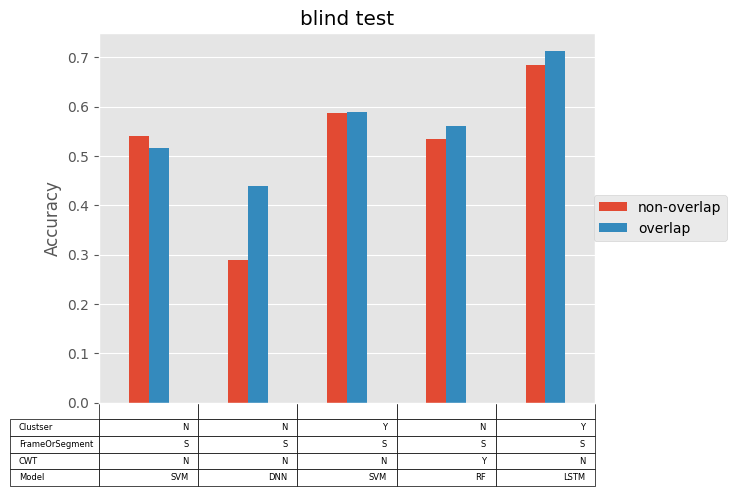

In [14]:
# compare
compare = 3 # 0 cluster, 2 cwt, 3 window
i = 1 # test blindtest
s = 0  # acc fa dr
sel = [0,2,3,7,13]
# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['test','blind test']
# select exp
compares = [
    ['N','Y'],
    ['frame','bs'],
    ['bs','cwt'],
    ['F','H'],
    ['svm', 'rf', 'dnn', 'lstm']
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]
legends = [
    ['No cluster', 'Add cluster'],
    ['Frame', 'Segment'],
    ['No CWT', 'Add CWT'],
    ['non-overlap', 'overlap'],
    ['SVM', 'Random Forest', 'DNN', 'LSTM']
]
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap',
    'Model'
]
cmp = compares[compare]

# acc fa dr
# for s in range(3):
dt = cols[i]
y = []
names = []#
for j, cmp in enumerate(compares[compare]):
    tmp = []
    tmp2 = []#
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            tmp.append(df3.iloc[k][dt[s]])
            tmp2.append(df3.iloc[k]['model'])#
    y.append(tmp)
    names.append(tmp2)#
    #print(tmp2)
cl = len(y)
fig = plt.figure()
ax = fig.add_subplot(111)

cell = [[],[],[],[],[]]
cmps = []
x=names[0]
for k in range(len(x)):
    c = ntocell(x[k])
    for j in range(5):
        cell[j].append(c[j])
del cell[compare]

row_labels = cmp_titles.copy()
del row_labels[compare]

y = np.array(y)
cell = np.array(cell)
if sel:
    y = y[:,sel]
    cell = cell[:,sel]

ax.title.set_text(subtitles[i])
width = 0.1*cl
x = np.arange(len(y[0]))
spare_width = (1 - width)/cl

for r in range(cl):
    ax.bar(x+r*width, y[r], width, label=legends[compare][r])
ax.set_xlim(-spare_width,len(x)-spare_width)
plt.xticks([])
plt.ylabel(axes[s])
plt.legend(loc='center right', bbox_to_anchor=(1.28, 0.5))

# plot table
table = plt.table(cellText=cell,
        rowLabels=row_labels,
        colLabels=['']*len(y[0]),
        loc='bottom')

table.auto_set_font_size(False)
table.set_fontsize(6)

plt.savefig(save_root+cmp_titles[compare]+'_'+axess[s]+'_'+str(i+1)+'.png', bbox_inches="tight")

### select to plot (cluster,cwt,window)

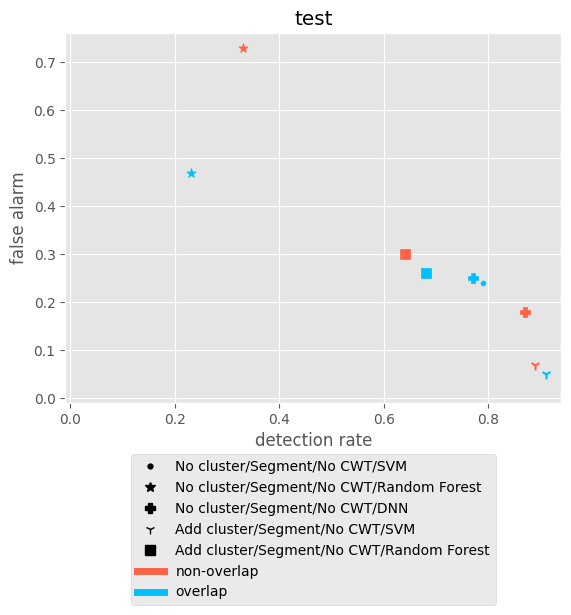

In [21]:
# compare
compare = 3 # 0 cluster, 2 cwt, 3 window
sel = [0,2,3,7,13]
i = 0 # te tt

# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['test','blind test']
# select exp
compares = [
    ['N','Y'],
    ['frame','bs'],
    ['bs','cwt'],
    ['F','H'],
    ['svm', 'rf', 'dnn', 'lstm']
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]
legends = [
    ['No cluster', 'Add cluster'],
    ['Frame', 'Segment'],
    ['No CWT', 'Add CWT'],
    ['non-overlap', 'overlap'],
    ['SVM', 'Random Forest', 'DNN', 'LSTM']
]
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap',
    'Model'
]
cmp = compares[compare]

dt = cols[i]
x = [] #dr
y = [] #fa
names = []#
for j, cmp in enumerate(compares[compare]):
    tmp0 = []
    tmp1 = []
    tmp2 = []
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            tmp0.append(df3.iloc[k][dt[1]])
            tmp1.append(df3.iloc[k][dt[2]])
            tmp2.append(df3.iloc[k]['model'])#
    y.append(tmp0)
    x.append(tmp1)
    names.append(tmp2)#
    #print(tmp2)
cl = len(y)
fig = plt.figure()
ax = fig.add_subplot(111)

y = np.array(y)
x = np.array(x)
if sel:
    y = y[:,sel]
    x = x[:,sel]

colors = ['tomato','deepskyblue']
markers = ['.','*','P','1','s']
for cc in range(2):
    for ss in range(len(sel)):
        # c=ntocls(names[cc][ss])
        # leg = clstolegend(c)
        # plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50, label=leg)
        plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50)

plt.title(subtitles[i])
plt.xlim(-0.01,np.max(x)+0.03)
plt.xlabel('detection rate')
plt.ylim(-0.01,np.max(y)+0.03)
plt.ylabel('false alarm')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.12), fancybox=True)
legs = []
for v in range(len(sel)):
    c=ntocls(names[0][v])
    leg = clstolegend(c, compare)
    legs.append(Line2D([], [], color='black', marker=markers[v], linestyle='None', markersize=7, label=leg))
legs.append(Line2D([0], [0], color=colors[0], lw=5, label=legends[compare][0]))
legs.append(Line2D([0], [0], color=colors[1], lw=5, label=legends[compare][1]))
plt.legend(handles=legs, loc='upper center', bbox_to_anchor=(0.5,-0.12), fancybox=True)

plt.savefig(save_root+cmp_titles[compare]+'_'+'FA&DR'+'_'+str(i+1)+'.png', bbox_inches="tight")

### Show (FOS)

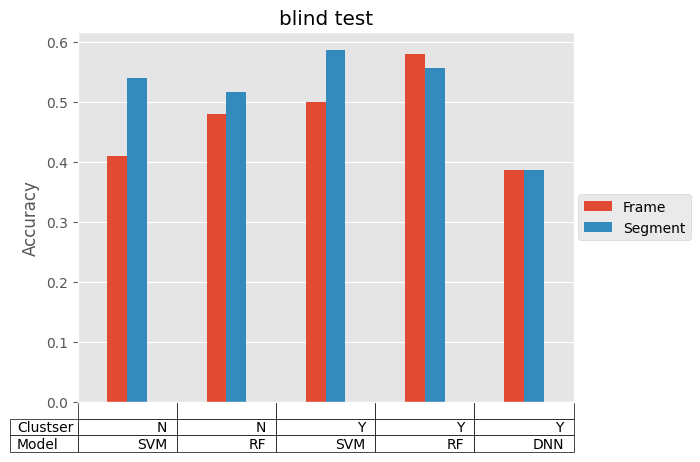

In [23]:
i = 1 # tr te tt
s = 0
sel = [0,1,3,4,5]

# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['test','blind test']
# select exp
compares = ['frame','bsF']
compares2 = [
    ['N','Y'],
    ['svm', 'rf', 'dnn', 'lstm']
]
legends = ['Frame', 'Segment']
cmp_titles = [
    'Clustser',
    'Model'
]
show_cmps = [
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]

nidx = [[],[]] # [frame idx, segment idx]
for j, cmp in enumerate(compares):
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            nidx[j].append(k)


# for i in range(1,3):
dt = cols[i]
y = np.array([df3.iloc[nidx[0]][dt[s]], df3.iloc[nidx[1]][dt[s]]])

cl = len(y)
fig = plt.figure()
ax = fig.add_subplot(111)

cell = [[],[]]
cmps = []
x=df3.iloc[nidx[0]]['model'].to_list()
for k in range(len(x)):
    for r in range(2):
        for j, cmp in enumerate(compares2[r]):
            if x[k].find(cmp)!=-1:
                cell[r].append(show_cmps[r][j])
                break
            if j==len(compares2[r])-1:
                cell[r].append('-')
row_labels = cmp_titles.copy()

# sort by max val
y = np.array(y)
cell = np.array(cell)
# idx = sorted(np.arange(len(y[0])), key = lambda s:(y[1]-y[0])[s])
# y = y[:,idx]
# cell = cell[:,idx]
if sel:
    y = y[:,sel]
    cell = cell[:,sel]

ax.title.set_text(subtitles[i])
width = 0.1*cl
x = np.arange(len(y[0]))
spare_width = (1 - width)/cl

for r in range(cl):
    ax.bar(x+r*width, y[r], width, label=legends[r])
ax.set_xlim(-spare_width,len(x)-spare_width)
plt.xticks([])
plt.ylabel(axes[s])
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

# plot table
plt.table(cellText=cell,
        rowLabels=row_labels,
        colLabels=['']*len(y[0]),
        loc='bottom')
    
plt.savefig(save_root+'FOS'+'_'+axess[s]+'_'+str(i+1)+'.png', bbox_inches="tight")

### select to plot (FOS)

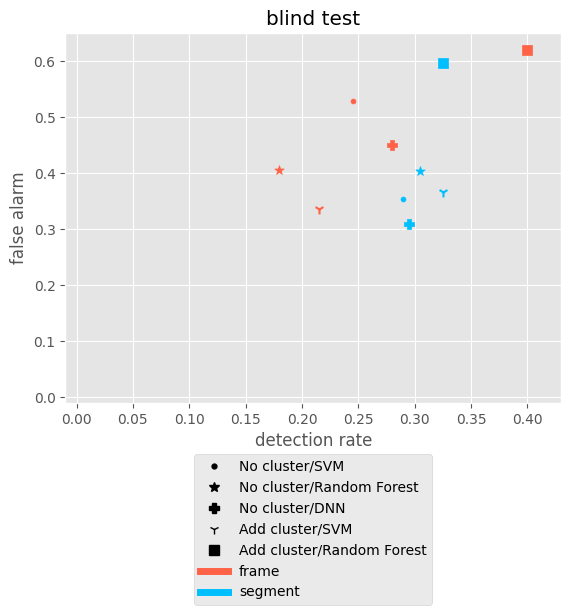

In [25]:
i = 1 # tr te tt
sel = [0,1,3,4,5]
# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['test','blind test']
# select exp
compares = ['frame','bsF']
compares2 = [
    ['N','Y'],
    ['svm', 'rf', 'dnn', 'lstm']
]
legends = ['Frame', 'Segment']
cmp_titles = [
    'Clustser',
    'Model'
]
show_cmps = [
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]

nidx = [[],[]] # [frame idx, segment idx]
for j, cmp in enumerate(compares):
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            nidx[j].append(k)



dt = cols[i]
y = [df3.iloc[nidx[0]][dt[1]], df3.iloc[nidx[1]][dt[1]]]
x = [df3.iloc[nidx[0]][dt[2]], df3.iloc[nidx[1]][dt[2]]]
names = [df3.iloc[nidx[0]]['model'], df3.iloc[nidx[1]]['model']]


cl = len(y)
fig = plt.figure()
ax = fig.add_subplot(111)


y = np.array(y)
x = np.array(x)
names = np.array(names)
if sel:
    y = y[:,sel]
    x = x[:,sel]

colors = ['tomato','deepskyblue']
markers = ['.','*','P','1','s']
for cc in range(2):
    for ss in range(len(sel)):
        # c=ntocls(names[cc][ss])
        # leg = clstolegend(c)
        # plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50, label=leg)
        plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50)

plt.title(subtitles[i])
plt.xlim(-0.01,np.max(x)+0.03)
plt.xlabel('detection rate')
plt.ylim(-0.01,np.max(y)+0.03)
plt.ylabel('false alarm')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.12), fancybox=True)
legs = []
for v in range(len(sel)):
    c=ntocls(names[0][v])
    leg = clstolegend(c, 1)
    legs.append(Line2D([], [], color='black', marker=markers[v], linestyle='None', markersize=7, label=leg))
legs.append(Line2D([0], [0], color=colors[0], lw=5, label='frame'))
legs.append(Line2D([0], [0], color=colors[1], lw=5, label='segment'))
plt.legend(handles=legs, loc='upper center', bbox_to_anchor=(0.5,-0.12), fancybox=True)

plt.savefig(save_root+'FOS'+'_'+'FA&DR'+'_'+str(i+1)+'.png', bbox_inches="tight")

### Show models

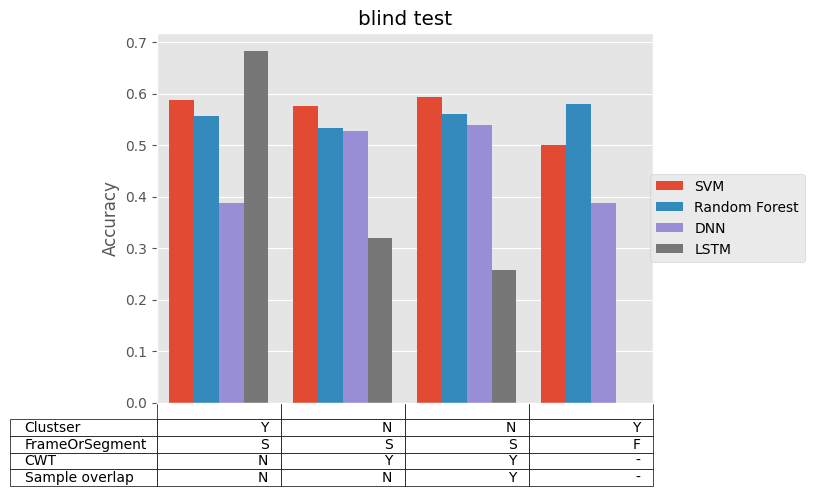

In [27]:
i = 1 # te tt
s = 0 # acc fa dr
sel = [1,4,6,9]

# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['test','blind test']
# select exp
compares = ['svm','rf','dnn','lstm']
legends = ['SVM', 'Random Forest', 'DNN', 'LSTM']
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap'
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y']
]

nidx = [[],[],[],[]] # [frame idx, segment idx]
for j, cmp in enumerate(compares):
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            nidx[j].append(k)


# for s in range(1,3):
dt = cols[i]
y = []
for j in range(4):
    y.append(df3.iloc[nidx[j]][dt[s]].tolist())
y[3].extend([0,0])
y = np.array(y)

cl = len(y)
fig = plt.figure()
ax = fig.add_subplot(111)

cell = [[],[],[],[],[]]
cmps = []
x=df3.iloc[nidx[0]]['model'].to_list()
for k in range(len(x)):
    c = ntocell(x[k])
    for j in range(5):
        cell[j].append(c[j])
del cell[4]

row_labels = cmp_titles.copy()

# sort by max val
y = np.array(y)
cell = np.array(cell)
# idx = sorted(np.arange(len(y[0])), key = lambda s:(np.max(y,axis=0)-np.min(y,axis=0))[s])
# y = y[:,idx]
# cell = cell[:,idx]
if sel:
    y = y[:,sel]
    cell = cell[:,sel]

ax.title.set_text(subtitles[i])
width = 0.2
x = np.arange(len(y[0]))
spare_width = (1 - width)/cl

for r in range(cl):
    ax.bar(x+r*width, y[r], width, label=legends[r])
ax.set_xlim(-spare_width,len(x)-spare_width)
plt.xticks([])
plt.ylabel(axes[s])
plt.legend(loc='center right', bbox_to_anchor=(1.32, 0.5))

# plot table
plt.table(cellText=cell,
        rowLabels=row_labels,
        colLabels=['']*len(y[0]),
        loc='bottom')
            
plt.savefig(save_root+'Model'+'_'+axess[s]+'_'+str(i+1)+'.png', bbox_inches="tight")

### Select to plot (model)

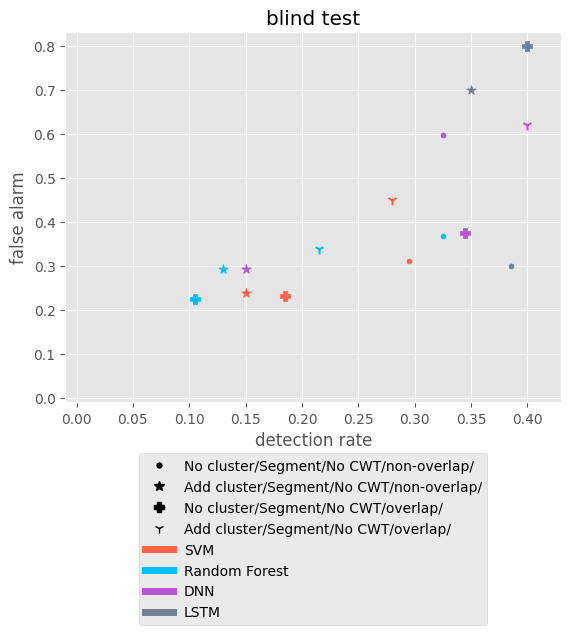

In [36]:
i = 1 # te tt
sel = [1,4,6,9]

# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['test','blind test']
# select exp
compares = ['svm','rf','dnn','lstm']
legends = ['SVM', 'Random Forest', 'DNN', 'LSTM']
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap'
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y']
]

nidx = [[],[],[],[]] # [frame idx, segment idx]
for j, cmp in enumerate(compares):
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            nidx[j].append(k)



dt = cols[i]
y = [df3.iloc[nidx[0]][dt[1]].tolist(), df3.iloc[nidx[1]][dt[1]].tolist(), df3.iloc[nidx[2]][dt[1]].tolist(), df3.iloc[nidx[3]][dt[1]].tolist()]
x = [df3.iloc[nidx[0]][dt[2]].tolist(), df3.iloc[nidx[1]][dt[2]].tolist(), df3.iloc[nidx[2]][dt[2]].tolist(), df3.iloc[nidx[3]][dt[2]].tolist()]
names = [df3.iloc[nidx[0]]['model'].tolist(), df3.iloc[nidx[1]]['model'].tolist(), df3.iloc[nidx[2]]['model'].tolist(), df3.iloc[nidx[3]]['model'].tolist()]
y[3].extend([0,0])
x[3].extend([0,0])
names[3].extend([0,0])

cl = len(y)
fig = plt.figure()
ax = fig.add_subplot(111)


y = np.array(y)
x = np.array(x)
names = np.array(names)
if sel:
    y = y[:,sel]
    x = x[:,sel]

colors = ['tomato','deepskyblue','mediumorchid','slategray']
markers = ['.','*','P','1','s','X','D','^','p']
for cc in range(4):
    for ss in range(len(sel)):
        # c=ntocls(names[cc][ss])
        # leg = clstolegend(c)
        # plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50, label=leg)
        if cc==3 and sel[ss]>6:
            continue
        plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50)

plt.title(subtitles[i])
plt.xlim(-0.01,np.max(x)+0.03)
plt.xlabel('detection rate')
plt.ylim(-0.01,np.max(y)+0.03)
plt.ylabel('false alarm')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.12), fancybox=True)
legs = []
for v in range(len(sel)):
    c=ntocls(names[0][v])
    leg = clstolegend(c, 4)
    legs.append(Line2D([], [], color='black', marker=markers[v], linestyle='None', markersize=7, label=leg))
legs.append(Line2D([0], [0], color=colors[0], lw=5, label='SVM'))
legs.append(Line2D([0], [0], color=colors[1], lw=5, label='Random Forest'))
legs.append(Line2D([0], [0], color=colors[2], lw=5, label='DNN'))
legs.append(Line2D([0], [0], color=colors[3], lw=5, label='LSTM'))
plt.legend(handles=legs, loc='upper center', bbox_to_anchor=(0.5,-0.12), fancybox=True)

plt.savefig(save_root+'Model'+'_'+'FA&DR'+'_'+str(i+1)+'.png', bbox_inches="tight")

### overall

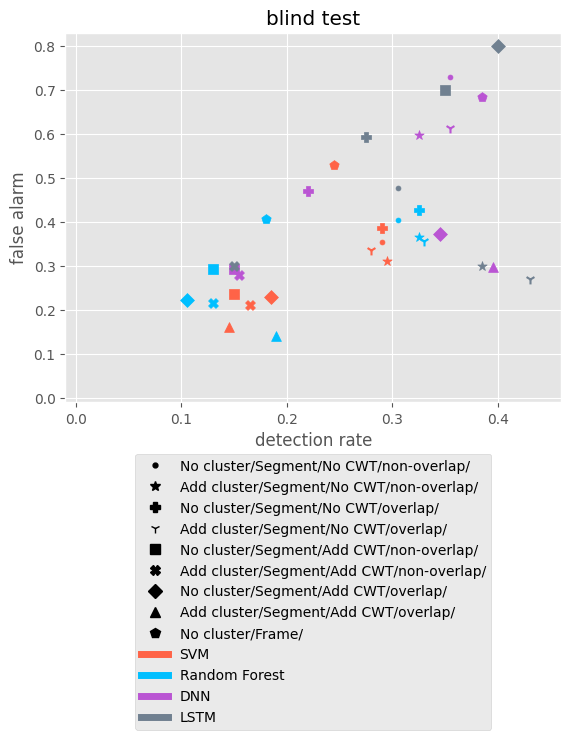

In [34]:
i = 1 # te tt
sel = [0,1,2,3,4,5,6,7,8]
hide = False

# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['test','blind test']
# select exp
compares = ['svm','rf','dnn','lstm']
legends = ['SVM', 'Random Forest', 'DNN', 'LSTM']
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap'
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y']
]

nidx = [[],[],[],[]] # [frame idx, segment idx]
for j, cmp in enumerate(compares):
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            nidx[j].append(k)



dt = cols[i]
y = [df3.iloc[nidx[0]][dt[1]].tolist(), df3.iloc[nidx[1]][dt[1]].tolist(), df3.iloc[nidx[2]][dt[1]].tolist(), df3.iloc[nidx[3]][dt[1]].tolist()]
x = [df3.iloc[nidx[0]][dt[2]].tolist(), df3.iloc[nidx[1]][dt[2]].tolist(), df3.iloc[nidx[2]][dt[2]].tolist(), df3.iloc[nidx[3]][dt[2]].tolist()]
names = [df3.iloc[nidx[0]]['model'].tolist(), df3.iloc[nidx[1]]['model'].tolist(), df3.iloc[nidx[2]]['model'].tolist(), df3.iloc[nidx[3]]['model'].tolist()]
y[3].extend([0,0])
x[3].extend([0,0])
names[3].extend([0,0])

cl = len(y)
fig = plt.figure()
ax = fig.add_subplot(111)


y = np.array(y)
x = np.array(x)
names = np.array(names)
if sel:
    y = y[:,sel]
    x = x[:,sel]

colors = ['tomato','deepskyblue','mediumorchid','slategray']
markers = ['.','*','P','1','s','X','D','^','p']
for cc in range(4):
    for ss in range(len(sel)):
        # c=ntocls(names[cc][ss])
        # leg = clstolegend(c)
        # plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50, label=leg)
        if (x[cc][ss] < 0.6 or y[cc][ss] > 0.4) and hide:
            continue
        if cc==3 and sel[ss]>6:
            continue
        plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50)

plt.title(subtitles[i])
if hide:
    plt.xlim(0.6,np.max(x)+0.03)
    plt.ylim(0,0.4)
else:
    plt.xlim(-0.01,np.max(x)+0.03)
    plt.ylim(-0.01,np.max(y)+0.03)
plt.xlabel('detection rate')
plt.ylabel('false alarm')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.12), fancybox=True)
legs = []
for v in range(len(sel)):
    c=ntocls(names[0][v])
    leg = clstolegend(c, 4)
    legs.append(Line2D([], [], color='black', marker=markers[v], linestyle='None', markersize=7, label=leg))
legs.append(Line2D([0], [0], color=colors[0], lw=5, label='SVM'))
legs.append(Line2D([0], [0], color=colors[1], lw=5, label='Random Forest'))
legs.append(Line2D([0], [0], color=colors[2], lw=5, label='DNN'))
legs.append(Line2D([0], [0], color=colors[3], lw=5, label='LSTM'))
plt.legend(handles=legs, loc='upper center', bbox_to_anchor=(0.5,-0.12), fancybox=True)

plt.savefig(save_root+'overall'+'_'+str(i+1)+'.png', bbox_inches="tight")